<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>

<h1 align=center> <font size = 5> Exercise-Linear Regression with TensorFlow </font></h1>

This exercise is about modelling a linear relationship between "chirps of a cricket" and ground temperature. 

In 1948, G. W. Pierce in his book "Songs of Insects" mentioned that we can predict temperature by listening to the freuency of songs(chirps) made by stripped Crickets. He recorded change in behaviour of crickets by recording number of chirps made by them at several "different temperatures" and found that there is a pattern in the way crickets respond to the rate of change in ground temperature 60 to 100 degrees of farenhite. He also found out that Crickets did not sing   
above or below this temperature.

This data is derieved from the above mentioned book and aim is to fit a linear model and predict the "Best Fit Line" for the given "Chirps(per 15 Second)" in Column 'A' and the corresponding "Temperatures(Farenhite)" in Column 'B' using TensorFlow. So that one could easily tell what temperature it is just by listening to the songs of cricket. 



### Let's import tensorFlow and python dependencies 

In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### Download and Explore the Data 

In [40]:
#downloading dataset
!wget -nv --no-check-certificate -O PierceCricketData.csv https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv

  Unable to locally verify the issuer's authority.
  Unable to locally verify the issuer's authority.
  Unable to locally verify the issuer's authority.
2017-09-28 03:51:21 URL:https://public.boxcloud.com/d/1/F8QIVK93JMjVeGZr33r7CE7k8OeYZmGIFuQs4Hmxfxo7xwEHxAe8VMhwJEVa38zv_75qGFWLMapFm25G66EutPIEfBEvUOG6gmjOd8a-FkaBfeMLsH2kNHqnTaXNRthGz2Iqqbg1pGCD8mc_mbbxi1f0B-dPLd19F0Cvy1TwcfxY5p0OcD2YAM8i6Cz-6_3s8TMYtD9yWN1glMktMGN9iQ_KuSmK-DHjNY0DLFhPi-2cAuMVFhpTzcFDSQVCnATgIjlVHeuT2TDH0X_NrWupMg7ckiZUbB30iAdhuKhc_6EsixxRi_0fge_aDSe6_LEGwmXwqj1WnZCf_5hFugnYVK3NsmW4mnFB0and-C1oEwDWTzk2bPNLNqESB6SXg2-Vs8gLG2ULMLb9v7555FEv5ogNNykFvb9b_XAuewEicYzZN0sNivVogjOyAQq3BECVVK1ozqxMX6aHwmQztF8srimBdnQR8O3xQSGqffGzLerTTkAESLTrGKyJZl4Em6alzxuMTSIQynn-lQPSTWn7SHrbSJrweZDwy-WZ115SpDJEtWhr16MGgnzBWz556Q9nfzgE-QsLHWdmKr_5kKO0RQYDnu3RSas_JjNV3DkF3MmlKf22B7znJozntB0m35jw_ukeYKAt5-kw33YI5UWmQKKLLLLsnkKBSQZzFBGM_p6idiupuym9DbwWDG995MNuyc07Xe8YDEx1tGD2bjd9Zitpk6v2n9o6VAjWt49RL-hqTLT_GOugHjAX3afEY4Oy4CcwOvFzx_DWgfZJontdPXR

In [41]:
df = pd.read_csv("PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


<h6> Plot the Data Points </h6>

15


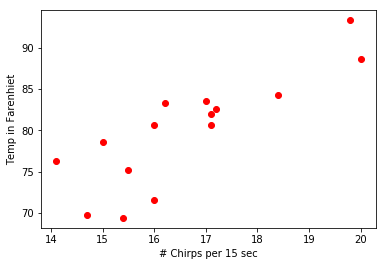

In [74]:
%matplotlib inline

x_data, y_data = (df["Chirps"].values,df["Temp"].values)

# plots the data points
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")
print x_data.size

Looking at the scatter plot we can analyse that there is a linear relationship between the data points that connect chirps to the temperature and optimal way to infer this knowledge is by fitting a line that best describes the data. Which follows the linear equation: 

 ####                                          Ypred = m X + c 

We have to estimate the values of the slope 'm' and the inrtercept 'c' to fit a line where, X is the "Chirps" and Ypred is "Predicted Temperature" in this case. 


### Create a Data Flow Graph using TensorFlow 

Model the above equation by assigning arbitrary values of your choice for slope "m" and intercept "c" which can predict the temp "Ypred" given Chirps "X" as input. 

example m=3 and c=2

Also, create a place holder for actual temperature "Y" which we will be needing for Optimization to estimate the actual values of slope and intercept.


In [109]:
# Create place holders and Variables along with the Linear model.
# use tf.placeholder(tf.float32, shape=(x_data.size)) command to load the X and Y data
# use tf.Variable to create a variable (do not forget to initialise)
# construct a Y prediction model (Ypred) using tf.add, tf.multiply
# Your code goes here



###  Create and Run a Session to Visualize the Predicted Line from above Graph 

<h6> Feel free to change the values of "m" and "c" in future to check how the initial position of line changes </h6>


In [110]:
#create session and initialize variables
session = tf.Session()
session.run(tf.global_variables_initializer())

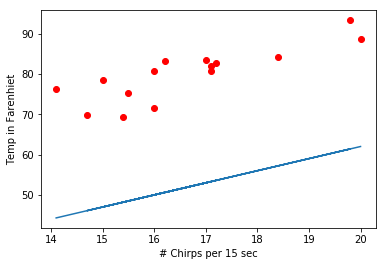

In [111]:
#get prediction with initial parameter values:
#run the session with your prediction model Ypred and feed x_data into X
#Your code goes here


#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")


### Define a  Graph for Loss Function

The essence of estimating the values for "m" and "c" lies in minimizing the difference between predicted "Ypred" and actual "Y" temperature values which is defined in the form of Mean Squared error loss function. 
      
$$ loss = \frac{1}{n}\sum_{i=1}^n{[Ypred_i - {Y}_i]^2} $$

Note: There are also other ways to model the loss function based on distance metric between predicted and actual temperature values. For this exercise Mean Suared error criteria is considered. 


In [112]:
# use tf.squared_difference and tf.reduce_mean to create a loss function
#Your code goes here

loss = tf.reduce_mean(tf.squared_difference(Ypred,Y))




### Define an Optimization Graph to Minimize the Loss and Training the Model





In [118]:
# create an optimizer by using tf.train.GradientDescentOptimizer with learning_rate=0.01
# create a train operation that calls optimizer.minimze method with you loss function as parameter
# in other words, pass the loss function to the optimizer to minimize.
# Your code goes here



### Initialize all the vairiables again


In [119]:
session.run(tf.global_variables_initializer())

###  Run session to train and predict the values of 'm' and 'c' for different training steps along with storing the losses in each step

Get the predicted m and c values by running a session on Training a linear model. Also collect the loss for different steps to print and plot.  

In [120]:
#run the session in parallel for [train, m, c,loss] by feeding x_data and y_data
#use _, _m , _c,_l as output variables so we can store then into steps dictionary and losses list for later

convergenceTolerance = 0.0001
previous_m = np.inf
previous_c = np.inf

steps = {}
steps['m'] = []
steps['c'] = []

losses=[]

for k in range(10000):
    
   ########## Your Code goes Here ###########


    if k%100 == 0 :
        print _m, _c
        
    steps['m'].append(_m)
    steps['c'].append(_c)
    losses.append(_l)
    if (np.abs(previous_m - _m) <= convergenceTolerance) or (np.abs(previous_c - _c) <= convergenceTolerance):
        
        print "Finished by Convergence Criterion"
        print k
        print _l
        break
    previous_m = _m, 
    previous_c = _c, 

3.09353 2.00561
Finished by Convergence Criterion
81
18.44


### Plot the new prediction

(4.6525583, 2.1022892)


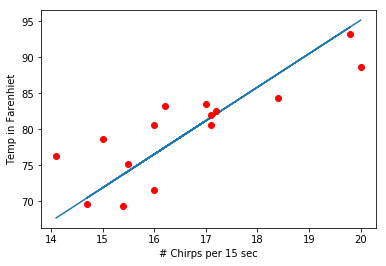

In [121]:
pred = session.run(Ypred, feed_dict={X:x_data})

m_opt, c_opt = session.run([m, c])
print(m_opt, c_opt)

#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")



### Print the loss function

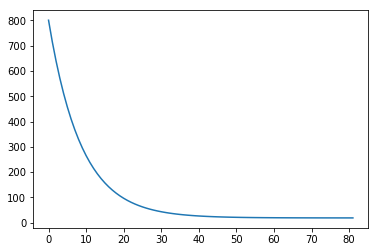

In [122]:
#use plt.plot to display the result stored in losses list
# Your Code Goes Here

plt.plot(losses[:])



In [80]:
session.close() 

This Exercise is about giving Overview about how to use TensorFlow for Predicting Ground Temperature given the number of Cricket Chirps per 15 secs. Idea is to use TnesorFlow's dataflow graph to define Optimization and Training graphs to find out the actual values of 'm' and 'c' that best describes the given Data. 


Please Feel free to change the initial values of 'm' and 'c' to check how the training steps Vary. 




## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.


### Thanks for completing this lesson!

Notebook created by:  <a href = "https://ca.linkedin.com/in/shashibushan-yenkanchi"> Shashibushan Yenkanchi </a> </h4>


# REFERENCES

http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm